# Apple Store Reviews
As a data Analyst you will apply key statistical concepts to analyze a dataset of Apple Store product reviews. Your objective is to perform descriptive and inferential statistical analysis to draw meaningful insights from the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv('./Apple_Store_Reviews.csv')
df.head(10)

,Review_ID,App_Name,User_Age,Review_Date,Rating,Review_Text,Likes,Device_Type,Version_Used,Country,Purchase_Amount,Category
0,1,Candy Crush Saga,21,2023-01-16,4,"Great game, but too many in-game purchases.",70,iPhone 12,3.231.19,Australia,0.00,Games
1,2,Spotify,57,2024-02-01,1,"Good, but has connection issues sometimes.",49,iPhone SE,4.102.9,Germany,7.15,Music
2,3,TikTok,33,2023-11-30,5,Awesome app! Best entertainment content.,98,iPhone 12,7.52.0,Germany,4.98,Entertainment
3,4,Audible,40,2023-04-03,5,"Great app, but it's a bit pricey.",74,iPhone 13,5.260.15,Australia,0.00,Books
4,5,Spotify,44,2023-05-01,1,"Good, but has connection issues sometimes.",47,iPhone SE,4.50.18,Australia,14.31,Music
5,6,Headspace,28,2024-05-04,3,Could be better. Some sessions don't work.,26,iPhone 13,7.191.0,India,7.45,Health
6,7,WhatsApp,30,2024-09-14,1,Terrible experience. The app doesn't work prop...,10,iPhone 14,4.279.13,Australia,9.78,Social
7,8,Clash of Clans,44,2022-12-07,1,Not worth the download. Keeps crashing.,20,iPhone 13,2.232.7,Australia,12.83,Games
8,9,TikTok,34,2024-02-11,1,Terrible! Hard to navigate and slow.,7,iPhone 11,2.102.4,Australia,0.00,Entertainment
9,10,Zoom,55,2023-02-25,1,Worst experience. Constantly crashes during me...,5,iPhone SE,1.294.20,US,0.00,Business


In [4]:
df.tail(10)

,Review_ID,App_Name,User_Age,Review_Date,Rating,Review_Text,Likes,Device_Type,Version_Used,Country,Purchase_Amount,Category
990,991,Candy Crush Saga,31,2024-03-25,1,Not worth the download. Keeps crashing.,7,iPhone 11,2.125.4,Australia,0.00,Games
991,992,Clash of Clans,28,2022-11-26,1,Not worth the download. Keeps crashing.,13,iPhone 11,9.46.20,Australia,13.22,Games
992,993,Audible,27,2023-06-27,1,Terrible. Very limited selection of books.,6,iPhone 14,8.249.2,US,0.00,Books
993,994,Audible,29,2023-09-18,1,"Good, but needs more features for listeners.",36,iPhone X,10.41.0,US,13.66,Books
994,995,Headspace,54,2022-11-02,1,Not helpful at all. Content is repetitive.,16,iPhone X,1.177.15,France,0.00,Health
995,996,Headspace,30,2023-11-15,3,"Good, but the premium content is expensive.",65,iPhone SE,6.284.11,US,0.00,Health
996,997,Duolingo,19,2024-09-27,1,Disappointing. Hard to follow and buggy.,4,iPhone SE,6.293.8,Canada,7.25,Education
997,998,Duolingo,38,2023-06-07,5,Excellent for learning new skills!,85,iPhone 11,10.277.15,Mexico,13.33,Education
998,999,Instagram,52,2024-03-04,4,"Great app, but sometimes it lags.",55,iPhone 13,3.52.20,US,6.37,Social
999,1000,Audible,25,2024-02-20,2,Terrible. Very limited selection of books.,7,iPhone 13,9.150.8,India,8.32,Books


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Review_ID        1000 non-null   int64  
 1   App_Name         1000 non-null   object 
 2   User_Age         1000 non-null   int64  
 3   Review_Date      1000 non-null   object 
 4   Rating           1000 non-null   int64  
 5   Review_Text      1000 non-null   object 
 6   Likes            1000 non-null   int64  
 7   Device_Type      1000 non-null   object 
 8   Version_Used     1000 non-null   object 
 9   Country          1000 non-null   object 
 10  Purchase_Amount  1000 non-null   float64
 11  Category         1000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


In [6]:
df.shape

(1000, 12)

*Calculate the mean, median, and mode of the app ratings in the dataset. Which measure (mean, median, or mode) best represents the central tendency of the ratings?*

In [7]:
mean = df['Rating'].mean()
median = df['Rating'].median()
mode = df['Rating'].mode()

print('Mean: ', mean)
print('Median: ', median)
print('Mode: ', mode)

Mean:  2.869
Median:  3.0
Mode:  0    1
Name: Rating, dtype: int64


The mean and median are very close with only 0.2 difference indicating data is normally distributed

*Find the range and interquartile range (IQR) of the Purchase_Amount in the dataset. How do these values help in understanding the spread of the data?*


In [8]:
df_range = df['Purchase_Amount'].max() - df['Purchase_Amount'].min()
iqr = df['Purchase_Amount'].quantile(0.75) - df['Purchase_Amount'].quantile(0.25)

print('Range: ', df_range)
print('IQR: {:.2f}'.format(iqr))

Range:  19.97
IQR: 10.19


The range and IQR have a difference of almost 9 suggesting data is spread out having significant extreme values.

*Calculate the variance and standard deviation for the number of likes received on reviews. What does the standard deviation indicate about the spread of the data?*

In [9]:
variance = df['Rating'].var()
std_dev = df['Rating'].std()

print('Variance: {:.2f}'.format(variance))
print('Standard Deviation: {:.2f}'.format(std_dev))

Variance: 2.15
Standard Deviation: 1.47


Variance and standard deviation have a difference of about 0.6 suggesting that data is clustered around mean and not spread out like `Purchase_Amount`

*Determine the correlation between the likes and the rating given. Is there a positive, negative, or no correlation between these variables?*

In [10]:
corr_likes_rating = df['Likes'].corr(df['Rating'])

print('Correlation between Likes and Rating: {:.2f}'.format(corr_likes_rating))

Correlation between Likes and Rating: 0.84


The correlation being almost close to 1 suggesting a strong relation between likes and rating which implicates that a larger population is facing the same problem on average.

*Plot the distribution of the app ratings. Is the distribution positively or negatively skewed? What does this indicate about user satisfaction?*

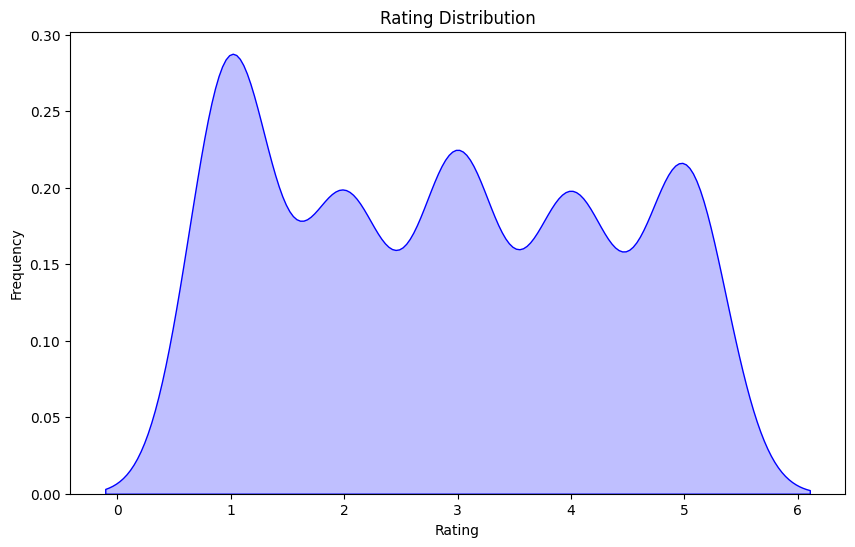

In [11]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Rating'], color='blue', fill=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The KDE plot indicates that most users are either dissatisfied (with lower ratings) or neutral (at a rating of 3), as it shows a higher concentration of ratings at 3 compared to 4 or 5. This suggests that users are generally more dissatisfied or indifferent rather than satisfied.

*Perform a hypothesis test to determine if the average rating for Instagram is significantly higher than the average rating for WhatsApp. Use a 95% confidence level.*

In [14]:
whatsapp_rating = df[df['App_Name'] == 'WhatsApp']['Rating']
instagram_rating = df[df['App_Name'] == 'Instagram']['Rating']

whatsapp_mean = whatsapp_rating.mean()
instagram_mean = instagram_rating.mean()

whatsapp_std = whatsapp_rating.std()
instagram_std = instagram_rating.std()

whatsapp_size = len(whatsapp_rating)
instagram_size = len(instagram_rating)

t_stat, p_val = stats.ttest_ind(whatsapp_rating, instagram_rating, alternative='greater')

alpha = 0.05

if p_val < alpha:
    print(f"Reject the null hypothesis: Instagram's average rating is significantly higher than WhatsApp's.")
else:
    print(f"Fail to reject the null hypothesis: No significant difference between Instagram's and WhatsApp's ratings.")

print(f"WhatsApp Mean Rating: {whatsapp_mean:.4f}")
print(f"Instagram Mean Rating: {instagram_mean:.4f}")
print(f"t-statistic: {t_stat:4f}")
print(f"p-value: {p_val:.4f}")

Fail to reject the null hypothesis: No significant difference between Instagram's and WhatsApp's ratings.
WhatsApp Mean Rating: 2.9327
Instagram Mean Rating: 2.7739
t-statistic: 0.796742
p-value: 0.2132


*Take random samples of ratings from the dataset and calculate their means. Create a sampling distribution and explain how this relates to the Central Limit Theorem.*

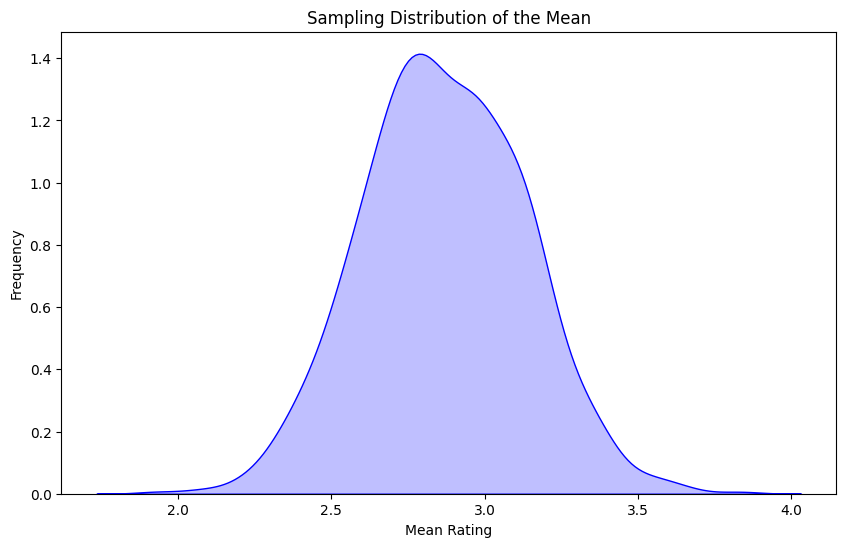

In [15]:
ratings = df['Rating']

sample_size = 30
num_samples = 1000

sample_means = np.zeros(num_samples)

for i in range(num_samples):
    sample = np.random.choice(ratings, sample_size, replace=True)
    sample_means[i] = sample.mean()

plt.figure(figsize=(10, 6))
sns.kdeplot(sample_means, color='blue', fill=True)
plt.title('Sampling Distribution of the Mean')
plt.xlabel('Mean Rating')
plt.ylabel('Frequency')
plt.show()

The Central Limit Theorem tells us that the sampling distribution of the sample means will approach a normal distribution as we increase the number of samples and the sample size, even if the original data distribution is skewed or not normal.